<h1 style = "font-size:3rem;color:darkcyan"> Preprocessing Data</h1>


In [3]:
# import libraries
import numpy as np
import json
import os
import librosa

In [8]:
# check how long audio files are
def get_dataset_info(dataset_path, sample_rate=48000):
    
    min_length = max_length = average_length = 0
    n_files = 0
    
    print('Going through all folders...')
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(root)):
        if dirpath is not root:
            for file in filenames:
                n_files +=1
                
                # load audio
                file_path = os.path.join(dirpath + '/' + file)
                audio_file, _ = librosa.load(file_path, sr = sample_rate, mono=True)
              
                audio_length = len(audio_file)
                
                average_length += audio_length
                
                if min_length > audio_length:
                    min_length = audio_length
                    
                if  max_length < audio_length:
                    max_length = audio_length
    
    average_length = average_length / n_files
    print('The average audio length = {}, min length = {}, and max length = {}'.format(average_length/sample_rate, min_length/sample_rate, max_length/sample_rate))
    return average_length/sample_rate, min_length/sample_rate, max_length/sample_rate  

In [9]:
average_duration, min_duration, max_duration = get_dataset_info('../../../Datasets/Speech/Digits/AudioMNIST/data/')

Going through all folders...
The average audio length = 0.6425932402777778, min length = 0.0, and max length = 0.9999583333333333


In [4]:
def preprocess_dataset(dataset_path, json_path, audio_duration, n_mfcc = 13, n_fft = 2048, hop_size = 512, sample_rate=48000):
    data  = {
        'mappings' : [],  # corresponding digit
        'labels' : [],    # corresponding number
        'MFCC' : [],      # extracted mfcc
        'filenames' : []  # original filenames
     }
   
    n_samples_in_audio_file = int(sample_rate * audio_duration)
    
    data['mappings'] = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
    
    n_folders = len(os.listdir(dataset_path))
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(root)):
        if dirpath is not root:
            print(f'processing folder {i} out of {n_folders}')
            
            for file in filenames:
                # load audio
                file_path = os.path.join(dirpath + '/' + file)
                audio_file, _ = librosa.load(file_path, sr = sample_rate, mono=True)
                
                # ignore if it contains too few samples
                if len(audio_file) >= n_samples_in_audio_file:
                    
                    audio_file = audio_file[:n_samples_in_audio_file]
                    
                    # extract mfccs
                    mfcc = librosa.feature.mfcc(y = audio_file,
                                                sr = sample_rate,
                                                n_mfcc = n_mfcc,
                                                n_fft = n_fft,
                                                hop_length = hop_size)

                    # store data
                    data['labels'].append(int(file[0]))
                    data['MFCC'].append(mfcc.T.tolist()) 
                    data['filenames'].append(file)        
    
    print(f'Saving dataset as {json_path}...')                
    with open(json_path, 'w') as fp:
        json.dump(data, fp, indent = 4)
    print(f'Done saving ') 

In [5]:
root = '../../../Datasets/Speech/Digits/AudioMNIST/data/'
preprocess_dataset(root, 'data.json', audio_duration = 0.5)

processing folder 1 out of 60
processing folder 2 out of 60
processing folder 3 out of 60
processing folder 4 out of 60
processing folder 5 out of 60
processing folder 6 out of 60
processing folder 7 out of 60
processing folder 8 out of 60
processing folder 9 out of 60
processing folder 10 out of 60
processing folder 11 out of 60
processing folder 12 out of 60
processing folder 13 out of 60
processing folder 14 out of 60
processing folder 15 out of 60
processing folder 16 out of 60
processing folder 17 out of 60
processing folder 18 out of 60
processing folder 19 out of 60
processing folder 20 out of 60
processing folder 21 out of 60
processing folder 22 out of 60
processing folder 23 out of 60
processing folder 24 out of 60
processing folder 25 out of 60
processing folder 26 out of 60
processing folder 27 out of 60
processing folder 28 out of 60
processing folder 29 out of 60
processing folder 30 out of 60
processing folder 31 out of 60
processing folder 32 out of 60
processing folder

In [15]:
def preprocess_dataset(dataset_path, json_path, audio_duration, min_duration = 0.1, n_mfcc = 13, n_fft = 2048, hop_size = 512, sample_rate=48000):
    data  = {
        'mappings' : [],  # corresponding genre
        'labels' : [],    # corresponding number
        'MFCC' : [],      # extracted mfcc
        'filenames' : []  # original filenames
     }
   
    n_samples_in_audio_file = int(sample_rate * audio_duration)
    min_n_samples = int(sample_rate * min_duration)
    
    data['mappings'] = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
    
    n_folders = len(os.listdir(dataset_path))
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(root)):
        if dirpath is not root:
            print(f'processing folder {i} out of {n_folders}')
            
            for file in filenames:
                # load audio
                file_path = os.path.join(dirpath + '/' + file)
                audio_file, _ = librosa.load(file_path, sr = sample_rate, mono=True)
                
                # only use legit audio
                if len(audio_file) > min_n_samples:
                    
                    # zero pad signal if needed to ensure even lengths
                    if len(audio_file) < n_samples_in_audio_file:
                        zero_pad = np.zeros(n_samples_in_audio_file - len(audio_file))
                        audio_file = np.append(audio_file, zero_pad)
                        
                         

                    # extract mfccs
                    mfcc = librosa.feature.mfcc(y = audio_file,
                                                sr = sample_rate,
                                                n_mfcc = n_mfcc,
                                                n_fft = n_fft,
                                                hop_length = hop_size)

                    # store data
                    data['labels'].append(int(file[0]))
                    data['MFCC'].append(mfcc.T.tolist()) 
                    data['filenames'].append(file)        
    
    print(f'Saving dataset as {json_path}...')                
    with open(json_path, 'w') as fp:
        json.dump(data, fp, indent = 4)
    print(f'Done saving ') 

In [16]:
root = '../../../Datasets/Speech/Digits/AudioMNIST/data/'
preprocess_dataset(root, 'data.json', audio_duration = max_duration, min_duration = 0.1)

processing folder 1 out of 60
processing folder 2 out of 60
processing folder 3 out of 60
processing folder 4 out of 60
processing folder 5 out of 60
processing folder 6 out of 60
processing folder 7 out of 60
processing folder 8 out of 60
processing folder 9 out of 60
processing folder 10 out of 60
processing folder 11 out of 60
processing folder 12 out of 60
processing folder 13 out of 60
processing folder 14 out of 60
processing folder 15 out of 60
processing folder 16 out of 60
processing folder 17 out of 60
processing folder 18 out of 60
processing folder 19 out of 60
processing folder 20 out of 60
processing folder 21 out of 60
processing folder 22 out of 60
processing folder 23 out of 60
processing folder 24 out of 60
processing folder 25 out of 60
processing folder 26 out of 60
processing folder 27 out of 60
processing folder 28 out of 60
processing folder 29 out of 60
processing folder 30 out of 60
processing folder 31 out of 60
processing folder 32 out of 60
processing folder

In [17]:
# compare mfcc

# import dataset
def import_dataset(dataset_path):
    with open(dataset_path, 'r') as f:
        data = json.load(f)
        
    # split data
    
    # split list into different np arrays
    mappings = np.array(data['mappings']) 
    inputs = np.array(data['MFCC'])
    targets = np.array(data['labels'])
    filenames = np.array(data['filenames'])
    
    return mappings, inputs, targets, filenames

In [18]:
mappings, inputs, targets, filenames = import_dataset('data.json')

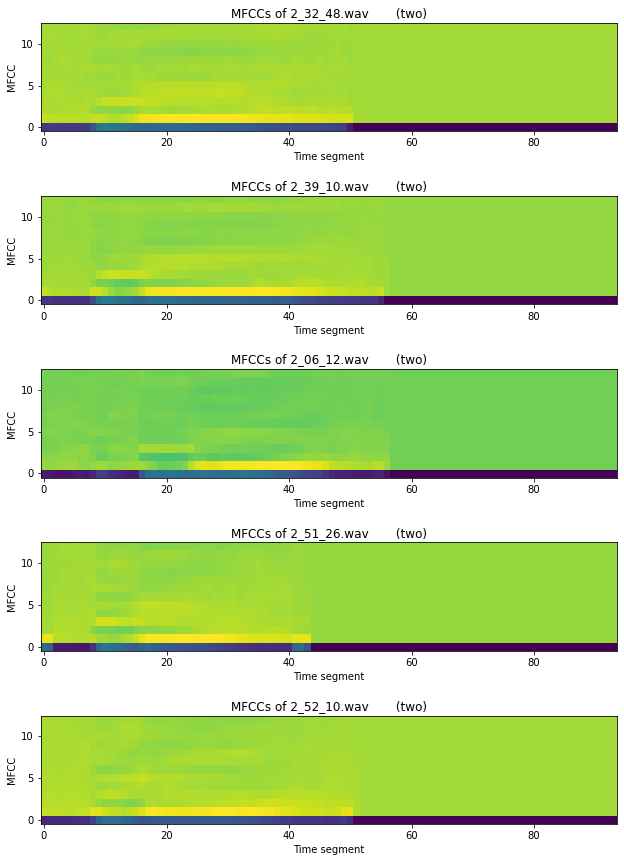

In [124]:
# compare random MFCCs of same digit with eachother

import matplotlib.pyplot as plt

num_subplots = 5
compare_digit = 2

# get random digits
matches = np.where(targets == compare_digit)
random_indices = np.random.randint(0,len(matches[0]), size = num_subplots) 
indices = matches[0][random_indices]

fig, ax = plt.subplots(num_subplots)
fig.set_figheight(8)
fig.set_figwidth(10)

for i in range(num_subplots):
    img = ax[i].imshow(inputs[indices[i]].T)
    ax[i].set_aspect('auto')
    ax[i].set_ylim(ax[i].get_ylim()[::-1])
    ax[i].set_title('MFCCs of {} {: >10})'.format(filenames[indices[i]], '(' + mappings[targets[indices[i]]]))
    ax[i].set_ylabel('MFCC')
    ax[i].set_xlabel('Time segment')
    
    
plt.subplots_adjust(left=0.1,
                    bottom=0.01, 
                    right=0.9, 
                    top=1.4, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()